In [1]:
# insurance_svr_model.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
# Load Dataset
df = pd.read_csv("insurance_pre.csv")

In [3]:
# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

In [4]:
# Define features and target
X = df_encoded.drop("charges", axis=1)
y = df_encoded["charges"]


In [5]:

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Feature Scaling
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

In [10]:
# Models to compare
models = {
    "SVR (RBF)": SVR(kernel='rbf', C=100, epsilon=0.1),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

In [11]:

# Evaluation results
evaluation_results = {}

for name, model in models.items():
    # Train
    if name == "SVR (RBF)":
        model.fit(X_train_scaled, y_train_scaled.ravel())
        y_pred_scaled = model.predict(X_test_scaled)
        y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    evaluation_results[name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2": r2
    }

    print(f"\n\033[1m{name}\033[0m")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")


SVR (RBF)
MAE: 2208.43
MSE: 19800276.06
RMSE: 4449.75
R² Score: 0.87

Decision Tree
MAE: 3159.00
MSE: 43555735.99
RMSE: 6599.68
R² Score: 0.72

Random Forest
MAE: 2550.59
MSE: 22091517.12
RMSE: 4700.16
R² Score: 0.86

Gradient Boosting
MAE: 2424.53
MSE: 18860900.43
RMSE: 4342.91
R² Score: 0.88


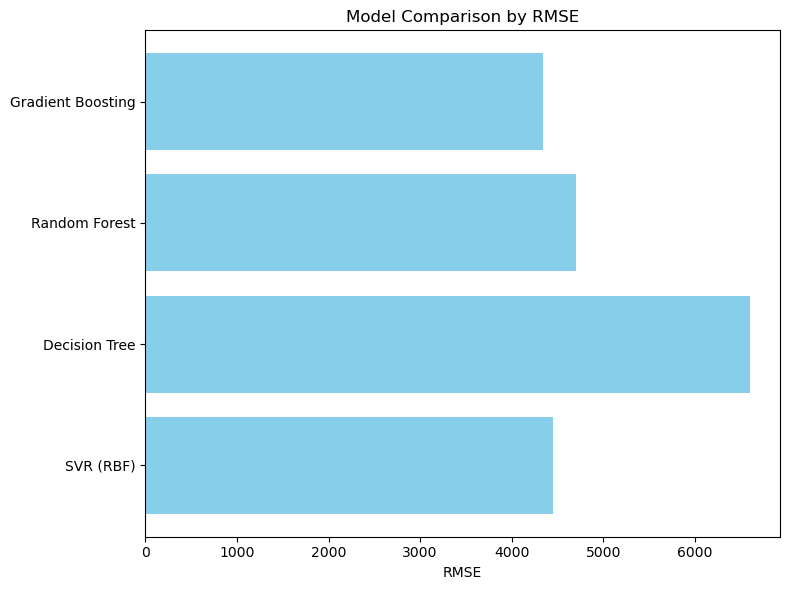

In [12]:
# Optional: Bar chart to compare RMSE
model_names = list(evaluation_results.keys())
rmse_values = [evaluation_results[m]["RMSE"] for m in model_names]

plt.figure(figsize=(8, 6))
plt.barh(model_names, rmse_values, color='skyblue')
plt.xlabel("RMSE")
plt.title("Model Comparison by RMSE")
plt.tight_layout()
plt.show()